<a href="https://colab.research.google.com/github/Christina-Joseph/Task-6--Decision-Tree-Classifier/blob/main/Task_6_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

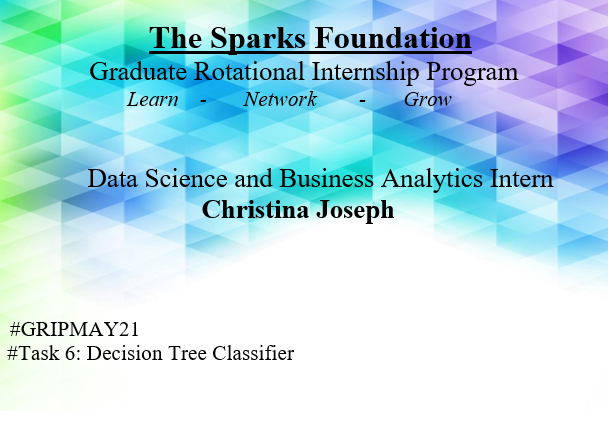

# **GRIP: THE SPARKS FOUNDATION**
# **Author: Christina Joseph**
__Data Science and Business Analytics Intern__ 

# **Task 6: Prediction using Decision Tree Algorithm**
__Problem Statement:__

In this particular task, we need to generate the Decision Tree classifier and visualize it graphically. The objective is even when we feed any new data to this classifier, it should be able to predict the right class accordingly.
 

__Data Description:__

The provided dataset consists of six columns which represents Id, Sepal length, Sepal width, petal length, petal width and iris species respectively.

Dataset:  https://bit.ly/3kXTdox


__Decision Tree Classifier:__
A Decision Tree is a supervised Machine learning algorithm. It is used in both classification and regression algorithms. Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.


#Step 1: Importing the Libraries

In [1]:
#Importing libraries in Python
import pandas as pd
import numpy as np  

import matplotlib.pyplot as plt  
import seaborn as sns
import pydot
from IPython.display import Image

from sklearn.datasets import load_iris

In [2]:
# Loading the iris dataset
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#Step 2: Exploratory Data Analysis

In [5]:
#Input data 

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
#dimensions of the dataset
data.shape

(150, 5)

In [7]:
#statistical detail of the dataset
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Step 3: Data Visualization

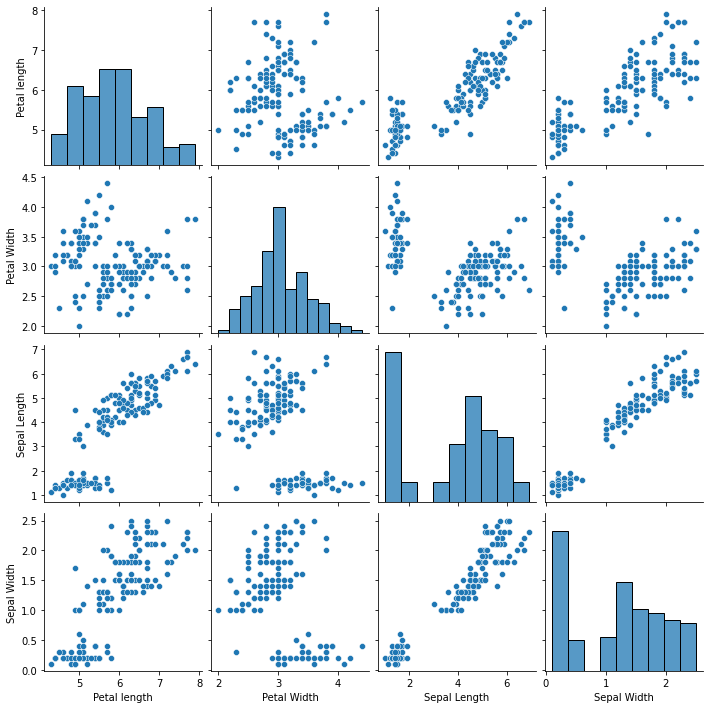

In [8]:
# Input data Visualization
sns.pairplot(data)

__Bivariate Analysis:__

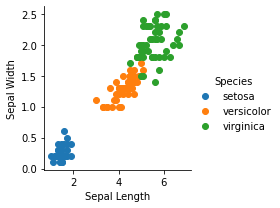

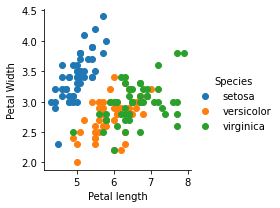

In [9]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

#Step 4: Training the model

In [10]:
#importing neccessary libraries for training the dataset
from sklearn.model_selection import train_test_split
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 


In [11]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#creating instance
dtree = DecisionTreeClassifier()

#fitting the model
dtree.fit(X_train,y_train)
print("Training Complete")

Training Complete


In [12]:
#performing predictions
y_pred = dtree.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1])

In [13]:
#comparing the actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error':y_pred-y_test}) 
df

,Actual,Predicted,Error
0,0,0,0
1,1,1,0
2,1,1,0
3,0,0,0
4,2,2,0
5,1,1,0
6,2,2,0
7,0,0,0
8,0,0,0
9,2,2,0


#Step 5: Constructing Decision Tree 

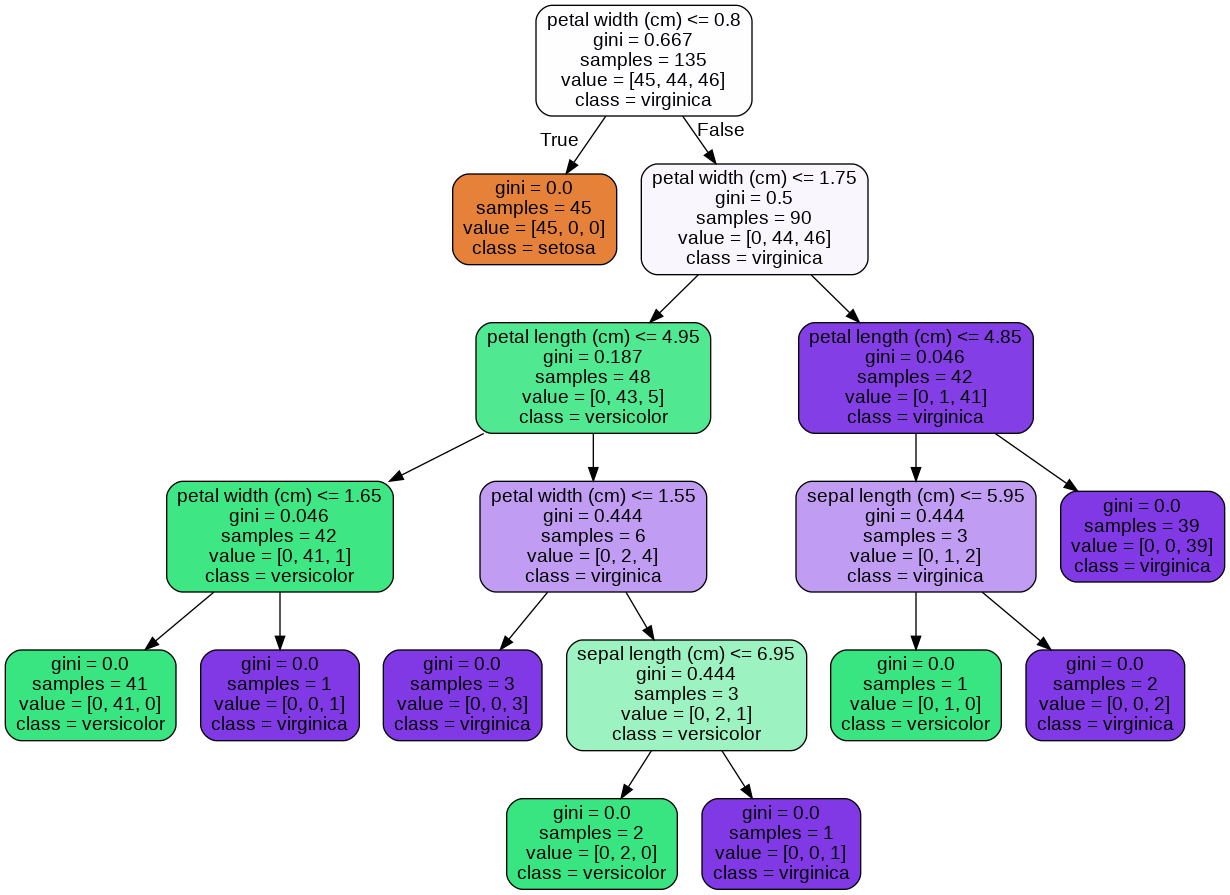

In [14]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration

export_graphviz(
        dtree,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png')

#Step 6: Predicting the class output for some random values of petal and sepal length and width

In [15]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',dtree.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


#Step 7: Model Accuracy

In [16]:
#Importing the metrics library
import sklearn.metrics as sm
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0


*The accuracy of this model is 1 or 100% since I have taken all the 4 features of the iris dataset for creating the decision tree model.*

                                                           **************************************************